In [1]:
# setup some librairies and display options
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# be careful we will only print the first 4 digits and round small numbers in arrays
np.set_printoptions(suppress=True, precision=4)

# libraries to make things interactive
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Markdown

import scipy
from display_helpers import bmatrix, pmatrix
import display_helpers

This notebook aims to provide a visualization on the net rotation resulting from choosing ZYX Euler angles. In particular, it can be used to visualize the singularity occuring when $\beta=\pm \frac{\pi}{2}$ and the other two angles produce a rotation along the same direction.

The code below displays a 3D cube with an orientation based on the choice of ZYX Euler angles. The angles, $\alpha$, $\beta$ and $\gamma$ describe a net rotation
$$R = R_z(\alpha) \cdot R_y(\beta) \cdot R_x(\gamma)$$ where $R_z$, $R_y$ and $R_x$ are rotations around the z, y and x axes respectively.

Note: if your browser does not update the matrices in real time below - change every occurence of `continuous_update = True` in the code below into `continuous_update = False`. This should enable the browser to update the matrices only after you release the slider.

### Illustration of ZYX Euler Angles

<IPython.core.display.Javascript object>


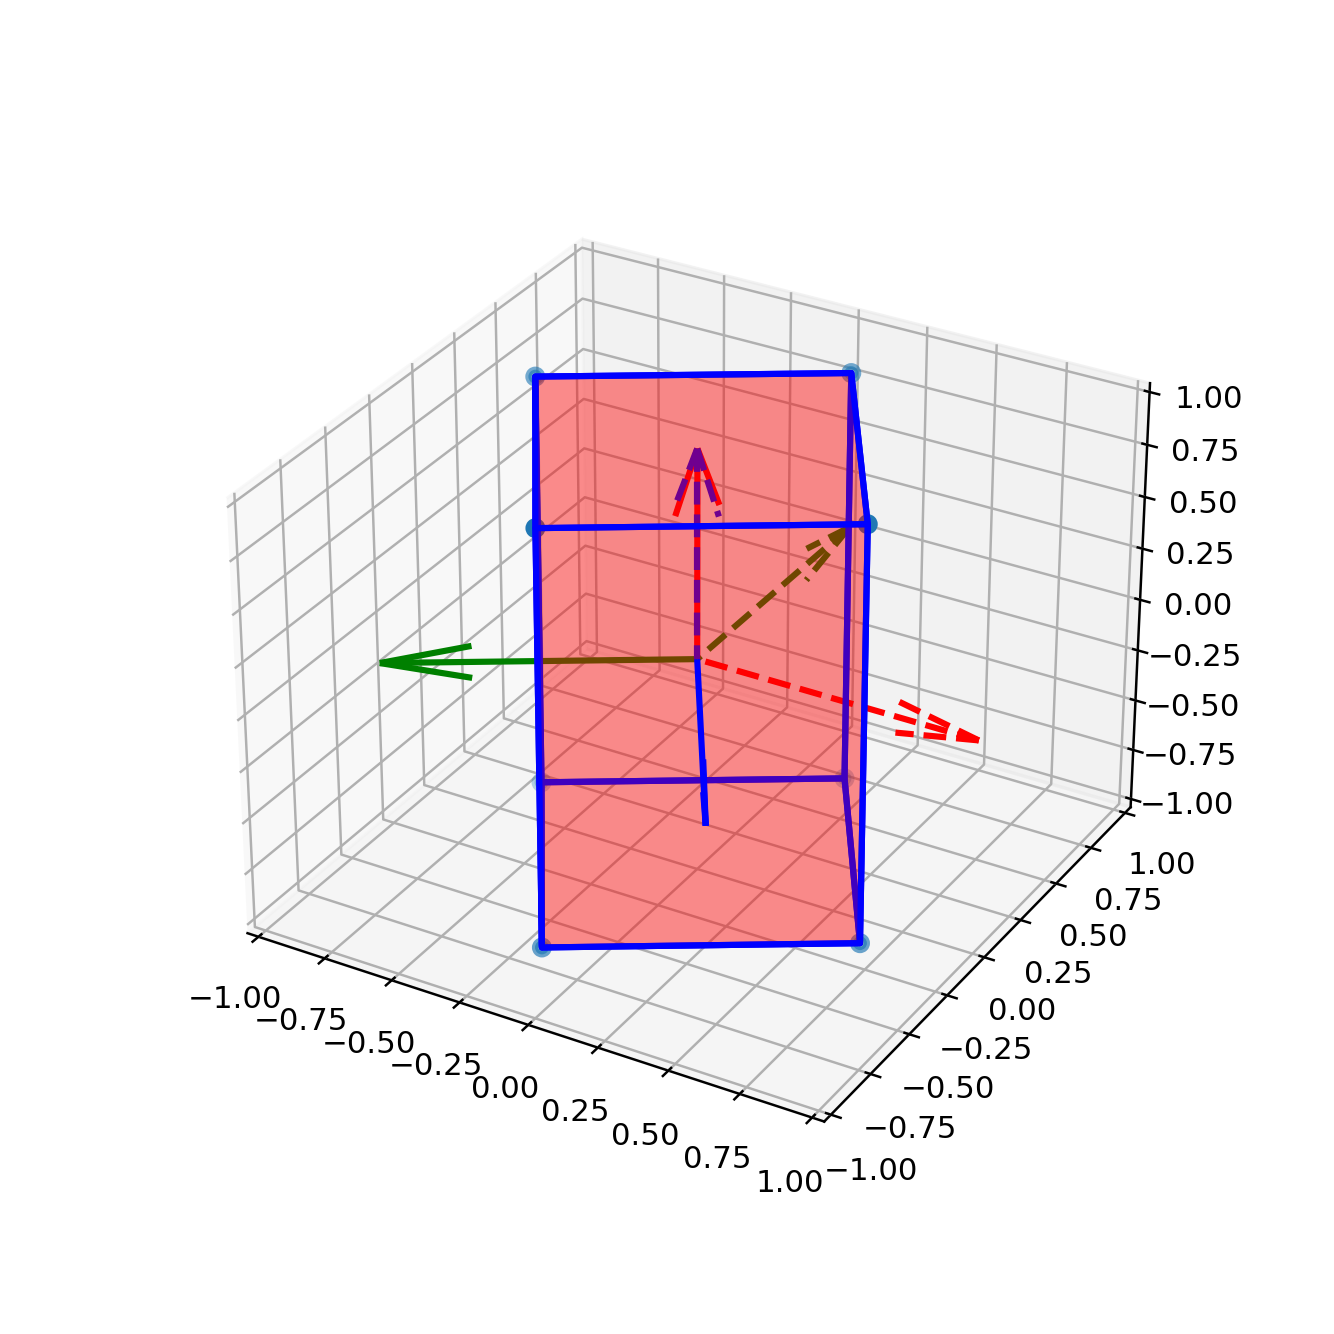

### Use the slider to change the Euler Angles

### Set beta=+- 3.14 to visualize the singularity

interactive(children=(FloatSlider(value=0.0, description='alpha', max=3.14, min=-3.14, step=0.01), FloatSlider…

<function __main__.<lambda>(alpha, beta, gamma)>

In [4]:
#rotation around x (Returns 4x4 matrix)
def Rx(th):
    return np.array([[1,0,0,0],
                     [0,np.cos(th),-np.sin(th),0],
                     [0,np.sin(th), np.cos(th),0],
                    [0,0,0,1]])

#rotation around y (returns 3x3 matrix)
def Ry(th):
    return np.array([[np.cos(th), 0, np.sin(th),0],
                    [0,1,0,0],
                    [-np.sin(th),0,np.cos(th),0],
                    [0,0,0,1]])

#rotation around z (returns 3x3 matrix)
def Rz(th):
    return np.array([[np.cos(th), -np.sin(th), 0,0],
                     [np.sin(th),np.cos(th),0,0],
                     [0,0,1,0],
                    [0,0,0,1]])

def rotate_cube_euler(ax, alpha, beta, gamma):
    """
        this plots the orientation of a cube given alpha, beta, gamma angles for ZYC Euler angles
    """
    # vertices of a cube
    vertices = np.array([[-1., -0.5, -0.5], [1, -0.5, -0.5], [1, 0.5, -0.5],  [-1, 0.5, -0.5], 
                         [-1., -0.5, 0.5], [1, -0.5, 0.5], [1, 0.5, 0.5],  [-1, 0.5, 0.5]])
    
    T_alpha = Rz(alpha)
    T_beta = Ry(beta)
    T_gamma = Rx(gamma)
    T = T_alpha @ T_beta @ T_gamma
    
    output = '$R_z = ' + bmatrix(T_alpha[0:3,0:3]) + ' \qquad '
    output += 'R_y = ' + bmatrix(T_beta[0:3,0:3]) + ' \qquad '
    output += 'R_x = ' + bmatrix(T_gamma[0:3,0:3]) + '$'
    display(Markdown(output))
    output = r'$R_z(\alpha ) \cdot R_y(\beta ) \cdot R_x(\gamma ) = ' + bmatrix(T[0:3,0:3]) + '$'
    display(Markdown(output))
    display_helpers.update_plot_cube3D(ax, vertices, T, plot_scale=1.0)
    
display(Markdown('### Illustration of ZYX Euler Angles'))

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')

display(Markdown('### Use the slider to change the Euler Angles'))
display(Markdown('### Set beta=+- 3.14 to visualize the singularity'))

interact(lambda alpha, beta, gamma: rotate_cube_euler(ax,alpha, beta, gamma), 
         alpha = widgets.FloatSlider(min=-3.14,max=3.14,step=0.01, value=0., continuous_update=True),
         beta = widgets.FloatSlider(min=-3.14/2,max=3.14/2,step=0.01, value=0., continuous_update=True),
         gamma = widgets.FloatSlider(min=-3.14,max=3.14,step=0.01, value=0., continuous_update=True))
